In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,columns=['sex','smoker'])

In [5]:
dataset=dataset.astype(int)

In [6]:
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27,0,16884,1,0,0,1
1,18,33,1,1725,0,1,1,0
2,28,33,3,4449,0,1,1,0
3,33,22,0,21984,0,1,1,0
4,32,28,0,3866,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0
1334,18,31,0,2205,1,0,1,0
1335,18,36,0,1629,1,0,1,0
1336,21,25,0,2007,1,0,1,0


In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [8]:
independent=dataset[['age', 'bmi', 'children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes']]

In [9]:
dependent=dataset[['charges']]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_features='sqrt')
regressor=regressor.fit(X_train,Y_train)

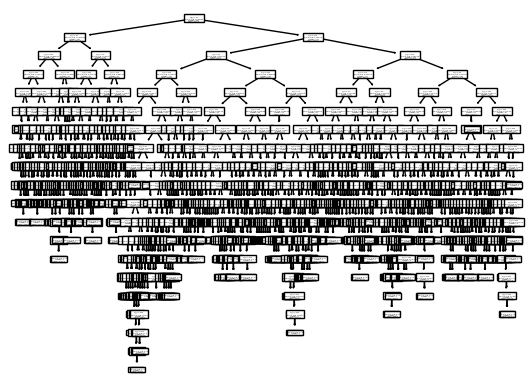

In [87]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [88]:
Y_pred=regressor.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)

In [90]:
r_score

0.7265545547528022